In [90]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv('Helsinki_HousingData.csv')

In [3]:
df.head(5)

,Municipality,area,Price,sqft,Year,Elevator,Condition,Energial.,number_of_room,hassauna,floor,total_floor
0,Kamppi,23.0,243000,10565,1932,1,2,E2018,1,0,1,5
1,Punavuori,41.0,340250,8299,2001,1,2,E2007,1,0,6,8
2,Kallio,37.0,240000,6486,1939,1,1,F2013,1,0,6,6
3,Kamppi,24.0,236000,9833,1936,1,1,E2018,1,0,2,4
4,Pajamäki,25.0,137100,5484,1959,0,2,F2013,1,0,2,4


In [21]:
df.describe()

,area,Price,sqft,Year,Elevator,Condition,number_of_room,hassauna,floor,total_floor
count,4652.000000,4.652000e+03,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.00000,4652.000000
mean,59.506879,2.749290e+05,4771.241617,1972.883706,0.589854,1.390155,2.327171,0.305675,3.11307,5.116079
std,25.178358,1.860989e+05,2069.200233,29.693764,0.491913,0.538931,0.968882,0.460742,1.84514,2.411688
min,12.500000,3.000000e+03,240.000000,1850.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000
25%,43.000000,1.660412e+05,3159.000000,1958.000000,0.000000,1.000000,2.000000,0.000000,2.00000,3.000000
50%,56.000000,2.250000e+05,4576.500000,1971.000000,1.000000,1.000000,2.000000,0.000000,3.00000,5.000000
75%,73.000000,3.200000e+05,6100.000000,1995.000000,1.000000,2.000000,3.000000,1.000000,4.00000,6.000000
max,345.000000,3.300000e+06,33228.000000,2021.000000,1.000000,3.000000,8.000000,1.000000,19.00000,65.000000


# Cleaning Data

In [5]:
# find the missing values if any
df.isna().sum()

Municipality         0
area                 0
Price                0
sqft                 0
Year                 0
Elevator             0
Condition            0
Energial.         1056
number_of_room       0
hassauna             0
floor                0
total_floor          0
dtype: int64

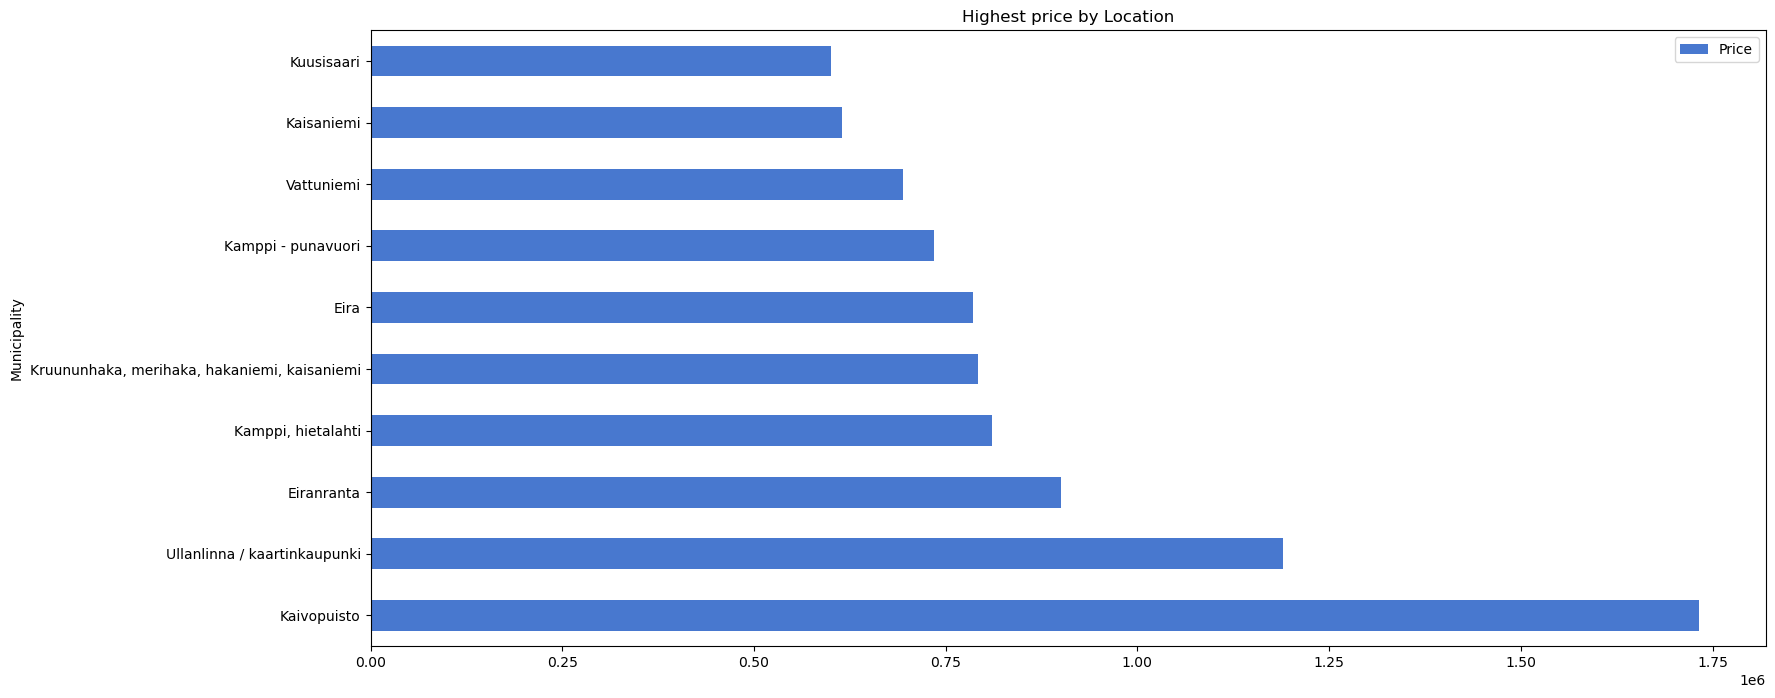

In [123]:
plt.style.use('seaborn-muted')
order = df.groupby('Municipality').agg({'Price':'median'}).sort_values(by='Price',ascending = False).head(10).plot(kind = 'barh',
                             figsize=(18,8),title = 'Highest price by Location')

<AxesSubplot:title={'center':'Median size of the house square meter'}, ylabel='Municipality'>

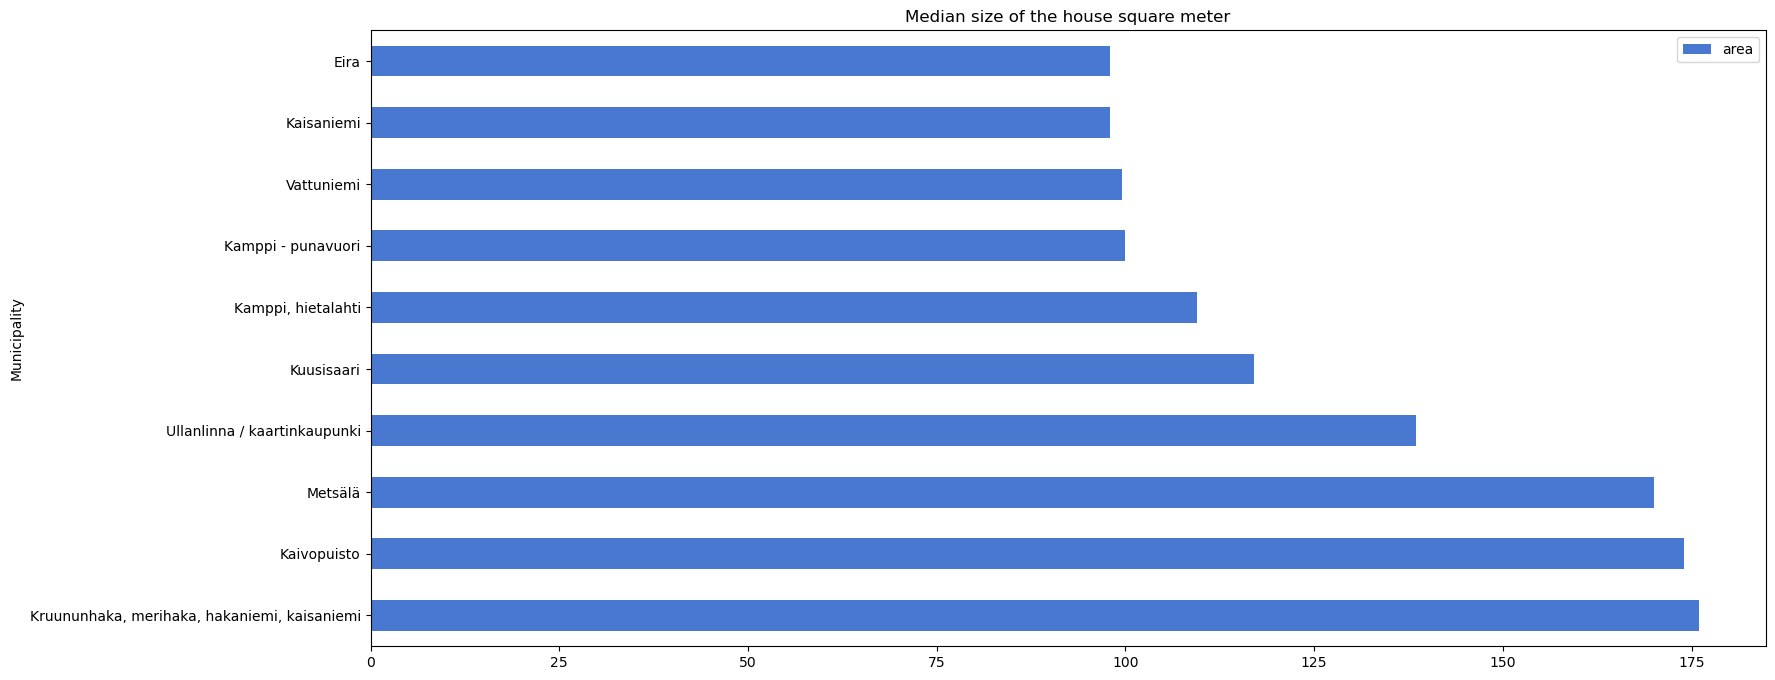

In [88]:
df.groupby('Municipality').agg({'area':'median'}).sort_values(by='area',ascending = False).head(10).plot(kind = 'barh',
                                    figsize=(18,8),title = 'Median size of the house square meter')

Text(0, 0.5, 'Price')

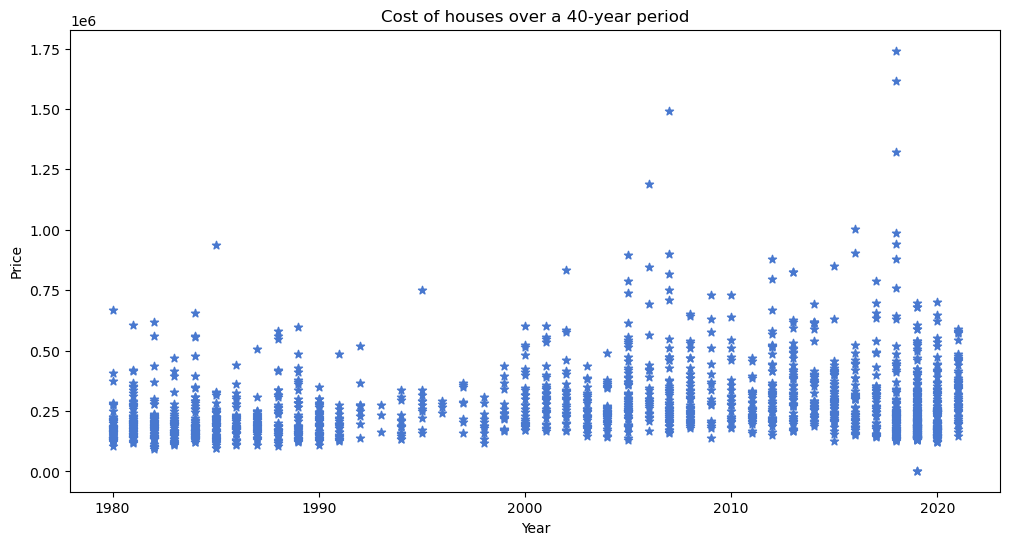

In [127]:

# Filter the dataframe
filtered_df = df[df['Year'] >= 1980]

# Calculate the mean price for each year
mean_prices = filtered_df.groupby('Year')['Price'].mean()

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['Year'], filtered_df['Price'], marker='*')
plt.title('Cost of houses over a 40-year period')
plt.xlabel('Year')
plt.ylabel('Price')



In [82]:
df.columns

Index(['Municipality', 'area', 'Price', 'sqft', 'Year', 'Elevator',
       'Condition', 'Energial.', 'number_of_room', 'hassauna', 'floor',
       'total_floor'],
      dtype='object')

In [37]:
df1 = df.drop(['Municipality','sqft','Elevator','Condition','Energial.','hassauna','total_floor'],axis = 1)


df1.head(4)

,area,Price,Year,number_of_room,floor
0,23.0,243000,1932,1,1
1,41.0,340250,2001,1,6
2,37.0,240000,1939,1,6
3,24.0,236000,1936,1,2


In [44]:
# Convert construction year to years old
df1['YearsOld'] = 2023 - df1['Year']

In [49]:
df1 = df1.drop(['Year'],axis=1)

In [50]:
df1.head(4)

,area,Price,number_of_room,floor,YearsOld
0,23.0,243000,1,1,91
1,41.0,340250,1,6,22
2,37.0,240000,1,6,84
3,24.0,236000,1,2,87


In [51]:
df1.corr()

,area,Price,number_of_room,floor,YearsOld
area,1.000000,0.671822,0.864112,0.014279,0.026665
Price,0.671822,1.000000,0.462849,0.130686,0.225513
number_of_room,0.864112,0.462849,1.000000,-0.011918,-0.097969
floor,0.014279,0.130686,-0.011918,1.000000,-0.063346
YearsOld,0.026665,0.225513,-0.097969,-0.063346,1.000000


# Splitting 

X: feature matrix 
 
y: target list

In [59]:
y = df1["Price"]
X = df1.drop(["Price"], axis=1)


print("X.shape =", X.shape)
print("y.shape =", y.shape)

X.shape = (4652, 4)
y.shape = (4652,)


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

Randomforest

In [115]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2_score(y_test, y_pred)

0.695268488497955

Standardizing data


In [116]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear regression

In [117]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred = linear_reg.predict(X_test_scaled)

linear_reg.score(X_test_scaled,y_test)

0.49054101859449994

Ridge regression

In [118]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train_scaled,y_train)
y_pred = ridge_reg.predict(X_test_scaled)

ridge_reg.score(X_test_scaled,y_test)

0.49179129058535787

KNN

In [119]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train_scaled,y_train)
knn.predict(X_test_scaled)

knn_score =  knn.score(X_test_scaled,y_test)
knn_score

0.7572217352010394

Plotting the model results

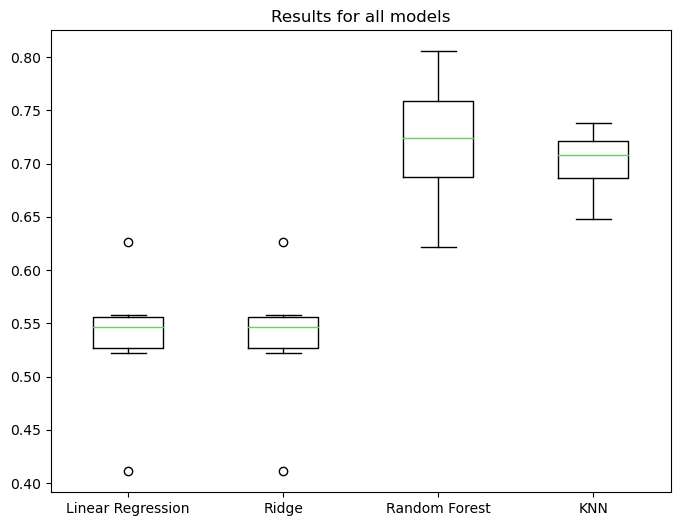

In [129]:
plt.figure(figsize=(8,6))
plt.title('Results for all models')
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1),"Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),'KNN': KNeighborsRegressor(n_neighbors=10)}
outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()